In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import roc_auc_score

**Importing the dataset**

In [3]:
data=pd.read_csv("Social_Network_Ads (1).csv")
data["Gender"]=data["Gender"].replace({"Male":1,"Female":0})
data.drop(["User ID","Gender"],axis=1,inplace=True)

**Splitting the dataset into the Training set and Test set**

In [4]:
x=data.drop("Purchased",axis=1)
y=data["Purchased"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Feature Scaling**

In [5]:
scaler=MinMaxScaler()
scaler.fit(x_train)
for i in ["Age","EstimatedSalary"]:
  x_train[[i]]=scaler.fit_transform(x_train[[i]])
scaler.fit(x_test)
for i in ["Age","EstimatedSalary"]:
  x_test[[i]]=scaler.fit_transform(x_test[[i]])

**Fitting Random Forest to the Training set**

In [6]:
depth=[]
score=[]
for i in range(2,10):
  model=RandomForestClassifier(max_depth=i)
  model.fit(x_train,y_train)
  depth.append(i)
  score.append(np.mean(cross_val_score(model,x_train,y_train)))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


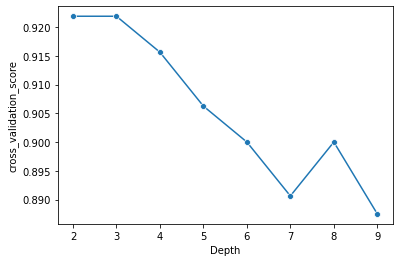

In [7]:
plt.xlabel("Depth")
plt.ylabel("cross_validation_score")
sns.lineplot(depth,score,marker="o")

In [8]:
model=RandomForestClassifier(max_depth=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

In [9]:
print("Training score : ",model.score(x_train,y_train))
print("testing score : ",model.score(x_test,y_test))

Training score :  0.934375
testing score :  0.875


**Predicting the Test set results**

In [10]:
y_pred=model.predict(x_test)
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
21,1,1
304,0,0
343,1,1
153,0,0
58,0,0
...,...,...
96,0,0
254,0,1
34,0,0
110,0,0


In [11]:
roc_auc_score(y_test,y_pred)

0.8602150537634409

**Making the Confusion Matrix**

In [12]:
confusion_matrix(y_test,y_pred)

array([[55,  7],
       [ 3, 15]])

**Visualising the Training set results**

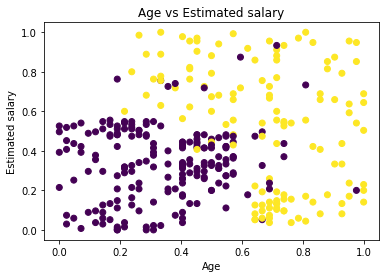

In [13]:
#visualization of training data
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_train["Age"],x_train["EstimatedSalary"],c=y_train)

**Visualising the Test set results**

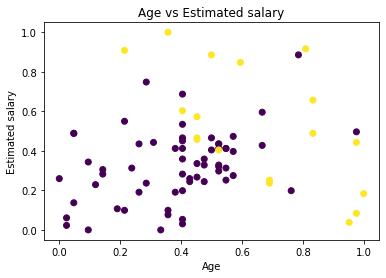

In [14]:
#visualization of testing data(Actual)
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_test["Age"],x_test["EstimatedSalary"],c=y_test)

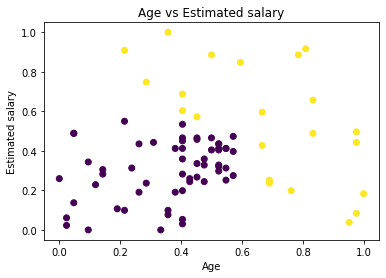

In [15]:
#visualization of testing data(Predicted)
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_test["Age"],x_test["EstimatedSalary"],c=y_pred)
     